In [199]:
import numpy as np
import pandas as pd
from collections import defaultdict

In [227]:
class KNNClassifier():
    """
    KNN Classifier.
    
    Parameters
    ------------------
    K: int
        K nearest neighbors. default 1 to m(Sample Size)
    distance: string
        distance metrics
    weight: (Not Using)
        
    Attributes
    ------------------
    """
    
    def __init__(self,algorithm = 'brute', distance = 'Euclidean',K=1,p=1,verbose=True):

        self.K = K
        self.verbose = verbose
        self.algorithm = algorithm
        """
        3 algorithms
        """
        
        self.distance = distance
        
        # When using _Minkowski_Distance, p needs to be set
        self.p = p
        
        if self.distance == 'Euclidean':
            self.distance_metrics = self._Euclidean_Distance
        elif self.distance == 'Manhattan':
            self.distance_metrics = self._Manhattan_Distance
        elif self.distance == 'Minkowski':
            self.distance_metrics = self._Minkowski_Distance
        elif self.distance == 'Mahalanobis':
            self.distance_metrics = self._Mahalanobis_Distance
        elif self.distance == 'Haversine':
            self.distance_metrics = self._Haversine_Distance
        elif self.distance == 'Cosine':
            self.distance_metrics = self._Cosine_Similarity
            
    def _Euclidean_Distance(self, X_test, X_train):
        m,n = X_train.shape
        # .tile(A,reps) repeat A for 'reps' times
        diff = np.tile(X_test,(m,1)) - X_train
        sqDiff = diff**2
        sumSqDiff = sqDiff.sum(axis=1)
        dist = sumSqDiff ** 0.5
        # .argsort() return the indices of sorted values
        return dist.argsort()
    
    def _Manhattan_Distance(self, X_test, X_train):
        m,n = X_train.shape
        diff = np.tile(X_test,(m,1)) - X_train
        absDiff = np.abs(diff)
        dist = absDiff.sum(axis=1)
        return dist.argsort()
    
    def _Minkowski_Distance(self, X_test, X_train):
        m,n = X_train.shape
        diff = np.tile(X_test,(m,1)) - X_train
        absDiff = np.abs(diff)
        sqAbsDiff = absDiff**self.p
        totalDiff = sqAbsDiff.sum(axis=1)
        dist = totalDiff**(1/self.p)
        return dist.argsort()
    
    def _Mahalanobis_Distance(self, X_test, X_train):
        pass
    
    def _Haversine_Distance(self, X_test, X_train):
        pass
    
    def _Cosine_Similarity(self, X_test, X_train):
        m,n = X_train.shape
        X_mat = np.tile(X_test,(m,1))
        dotproduct = np.sum(X_mat*X_train,axis=1)
        cos = dotproduct/np.sqrt((np.sum(X_mat*X_mat,axis=1)*np.sum(X_train*X_train,axis=1)))
        return cos.argsort()
        
    def fit(self,X_train,y_train):
        """
        Fit method for training data.
        
        Parameters:
        -----------------------
        X_train: {array-like}, shape = [n_samples, n_features]
            Training matrix, where 'n_samples' is the number of samples 
            and 'n_features' is the number of features
        y_train: {array-like}, shape = [n_samples]
            Target labels
        
        Attributes:
        -----------------------
        d_record_: list
            Record all distance.
        error_rate_: list
            Record all missclassification rate.  
        
        Returns:
        ------------------------
        self: object
        
        """
        # Check datatype 
        if isinstance(X_train,np.ndarray) and isinstance(y_train,np.ndarray):
            pass
        else:
            try:
                X_train = np.array(X_train)
                y_train = np.array(y_train)
            except:
                raise TypeError('numpy.array required for input data')
                
        if self.algorithm == 'brute':
            self.X_train = X_train
            self.y_train = y_train
            
    def _pred(self, X_test_row):
        
        if isinstance(X_test_row,np.ndarray):
            pass
        else:
            try:
                X_test_row = np.array(X_test_row)
            except:
                raise TypeError('numpy.array required for input data')
                
        SortedDistIndex = self.distance_metrics(X_test_row,self.X_train)

        classCount = defaultdict(int)
        ans = []
        
        for j in range(self.K):
            label = self.y_train[SortedDistIndex[j]][0]
            classCount[label] += 1
            
        sortedPredict = sorted(classCount.items(), key=lambda item: item[1])
        ans.append(sortedPredict[0][0])
        
        return ans

    def predict(self, X_test):
        
        if isinstance(X_test,np.ndarray):
            pass
        else:
            try:
                X_test = np.array(X_test)
            except:
                raise TypeError('numpy.array required for input data')
                
        m,n = X_test.shape
        
        prediction = []
        
        for i in range(m):
            
            ans = self._pred(X_test[i])
            if self.verbose == True:
                print('=================>>>>>>>>>>>>>>>>>>>>>>>>>>\n')
                print('Dealing with {} item.\n'.format(i))
            prediction.append(ans)
        
        return prediction 
    
    
if __name__ == '__mian__':
    from sklearn import datasets
    import pandas as pd
    iris = datasets.load_iris()

    feature = pd.DataFrame(iris.data,columns=iris.feature_names)
    target = pd.DataFrame(iris.target,columns=['target'])
    df = pd.concat([feature,target],axis=1)
    df = df[df['target']!=2]
    df =df.reset_index()
    target = df['target'].to_frame()
    feature = df.drop('target',axis=1)
    X_train = feature.to_numpy()
    #data_mat = np.asmatrix(feature)
    y_train = target.to_numpy()
    #label_mat = np.asmatrix(target)
    knn = KNNClassifier(distance = 'Euclidean', p = 1, K = 3)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_train)
    from sklearn.metrics import confusion_matrix
    confusion_matrix(y_train,y_pred)

In [229]:
# import KNNClassifier

In [230]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size
data_path = "/Users/qijin/Documents/GitHub/Machine-Learning-Models/KNN/KNN Classifier/mnist/"
train_data = np.loadtxt(data_path + "mnist_train.csv", 
                        delimiter=",")
test_data = np.loadtxt(data_path + "mnist_test.csv", 
                       delimiter=",") 
test_data[:10]

array([[7., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [9., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.]])

In [231]:
test_data[1]

array([  2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0., 116., 125., 171., 255.,
       255., 150.,  93.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0., 169., 253., 253., 253., 253., 253., 253., 218.,  30.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0., 169., 25

In [232]:
test_data.shape

(10000, 785)

In [241]:
fac = 0.99 / 255
train_imgs = np.asfarray(train_data[:, 1:]) * fac + 0.01
test_imgs = np.asfarray(test_data[:, 1:]) * fac + 0.01
test_imgs = test_imgs[:100]
train_labels = np.asfarray(train_data[:, :1])
test_labels = np.asfarray(test_data[:, :1])
test_labels = test_labels[:100]

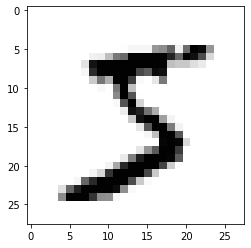

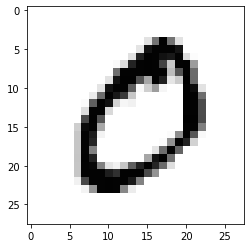

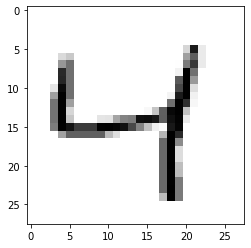

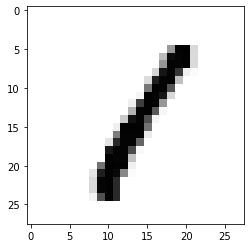

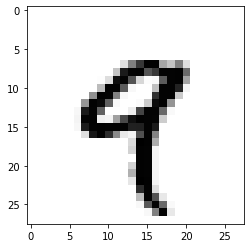

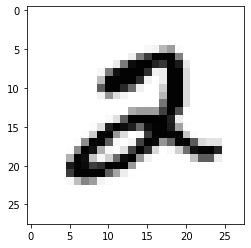

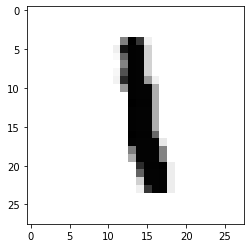

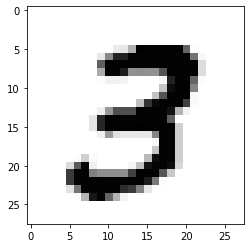

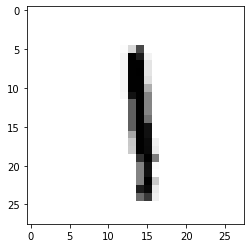

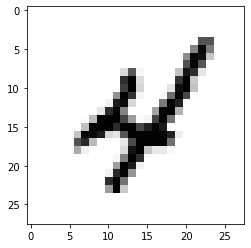

In [242]:
for i in range(10):
    img = train_imgs[i].reshape((28,28))
    plt.imshow(img, cmap="Greys")
    plt.show()

In [243]:
knn = KNNClassifier(distance='Euclidean', K=5)
knn.fit(train_imgs,train_labels)

In [244]:
results = knn.predict(test_imgs)

=================>>>>>>>>>>>>>>>>>>>>>>>>>>

Dealing with 0 item.

=================>>>>>>>>>>>>>>>>>>>>>>>>>>

Dealing with 1 item.

=================>>>>>>>>>>>>>>>>>>>>>>>>>>

Dealing with 2 item.

=================>>>>>>>>>>>>>>>>>>>>>>>>>>

Dealing with 3 item.

=================>>>>>>>>>>>>>>>>>>>>>>>>>>

Dealing with 4 item.

=================>>>>>>>>>>>>>>>>>>>>>>>>>>

Dealing with 5 item.

=================>>>>>>>>>>>>>>>>>>>>>>>>>>

Dealing with 6 item.

=================>>>>>>>>>>>>>>>>>>>>>>>>>>

Dealing with 7 item.

=================>>>>>>>>>>>>>>>>>>>>>>>>>>

Dealing with 8 item.

=================>>>>>>>>>>>>>>>>>>>>>>>>>>

Dealing with 9 item.

=================>>>>>>>>>>>>>>>>>>>>>>>>>>

Dealing with 10 item.

=================>>>>>>>>>>>>>>>>>>>>>>>>>>

Dealing with 11 item.

=================>>>>>>>>>>>>>>>>>>>>>>>>>>

Dealing with 12 item.

=================>>>>>>>>>>>>>>>>>>>>>>>>>>

Dealing with 13 item.

=================>>>>>>>>>>>>>>>>>>>>>>>>>>

Dealing with 

In [252]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

print(accuracy_score(test_labels,results))
print('\n')
print(confusion_matrix(test_labels,results))
print('\n')
print(classification_report(test_labels,results))

0.92


[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  1  5  1  0  0  0  1  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0 12  0  0  0  0  2]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0]
 [ 0  0  1  0  0  0  0  0  1  0]
 [ 0  0  0  0  1  0  0  1  0  9]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       0.93      1.00      0.97        14
         2.0       0.83      0.62      0.71         8
         3.0       0.92      1.00      0.96        11
         4.0       0.92      0.86      0.89        14
         5.0       1.00      1.00      1.00         7
         6.0       1.00      1.00      1.00        10
         7.0       0.88      1.00      0.94        15
         8.0       1.00      0.50      0.67         2
         9.0       0.82      0.82      0.82        11

    accuracy                           0.92       100
   macro a